Kelompok 11

Anggota :

- Safira Amalia Puspitasari R (2101191008)
- Agita Purwandani (2101191006)
- Tyas Oksi Praktika (2101191014)

In [ ]:
import pandas as pd #librari berlisensi BSD dan open source
import numpy as np # pemanggilan numpy dengan prefix np
import matplotlib.pyplot as plt # Penggunaan as artinya kita menggantikan pemanggilan fungsi pyplot pada matplotlib dengan prefix plt untuk proses berikutnya
import sklearn # melakukan processing data
from sklearn.neural_network import MLPClassifier # mengklasifikasikan skenario percobaan

# Import necessary modules
from sklearn.model_selection import train_test_split # untuk membagi data untuk data uji dan data latih (sublibrary)
from sklearn.metrics import accuracy_score # menghitung akurasi subset
import seaborn as sns

In [ ]:
df = pd.read_csv('seeds_dataset.csv') #membaca data dalam bentuk csv dengan bantuan pandas (pd)

In [ ]:
df.head() #menampilkan lima data

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
df.describe().transpose() #data numeric, untuk mengetahui apakah data ada yang NaN

,count,mean,std,min,25%,50%,75%,max
area,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
perimeter,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
compactness,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
lengthOfKernel,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
widthOfKernel,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
asymmetryCoefficient,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
lengthOfKernelGroove,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500
seedType,210.0,2.000000,0.818448,1.0000,1.00000,2.00000,3.000000,3.0000


In [ ]:
df.shape #memperlihatkan ukuran data

(210, 8)

Data seeds memiliki 210 data, 7 fitur dan 1 kolom target

In [ ]:
X = df[['area','perimeter','compactness','lengthOfKernel','widthOfKernel','asymmetryCoefficient','lengthOfKernelGroove']] #pengelompokan data untuk diambil fiturnya
y = df['seedType'] #sebagai target

X= Fitur
y= Target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4) #membagi data dalam trains set


Membagi data menjadi data uji dan data latih dengan data uji 20% dan data latih 80%.
Data diacak dengan nilai 4

In [ ]:
y_test #memastikan setiap target/kategori sudah ada di dalam data uji dan data latih

34     1
195    3
118    2
18     1
91     2
1      1
123    2
173    3
143    3
82     2
169    3
11     1
177    3
112    2
68     1
88     2
175    3
199    3
193    3
209    3
14     1
139    2
196    3
76     2
90     2
182    3
45     1
127    2
189    3
62     1
198    3
93     2
33     1
48     1
101    2
116    2
6      1
47     1
185    3
77     2
133    2
171    3
Name: seedType, dtype: int64

In [ ]:
print(X_train.shape, X_test.shape) #menampilkan shape fitur pada data latih dan data uji
print(y_train.shape, y_test.shape) #menampilkan shape target pada data latih dan data uji 

(168, 7) (42, 7)
(168,) (42,)




*   Jumlah data latih ada 168 data dan data uji berjumlah 42
*   Fitur yang digunakan ada 7 ciri







In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler(copy=True, with_mean=True, with_std=True)

Melakukan Preprocessing pada fitur data latih dan fitur data uji

Scaler membuat tiap fitur memiliki nilai rata-rata 0 dan variansi 1 

In [ ]:
X_train = scaler.transform(X_train) #mendekripsikan ke dalam scaler X_train dan X_test
X_test = scaler.transform(X_test)

Melakukan pembangunan algoritma Neural Network

Sistem klasifikasi Neural Network ini menggunakan parameter dua hidden layer dengan hidden layer pertama 10 neuron dan hidden layer kedua 5 neuron dan maksimum iterasi 700 kali, 

selebihnya paramater yang digunakan adalah auto dari mlpclassifer

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=700)
mlp.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=700,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Selanjutnya melakukan pelatihan pada data latih dan melakukan pengecekan 
terhadap data latih untuk melihat apakah data latih asli dan data latih predictions benar atau dapat dikenali dengan baik.

Confusion matrix untuk melakukan evaluasi pada data latih


In [ ]:
predictions = mlp.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_train, predictions)
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95        58
           2       0.98      0.98      0.98        55
           3       0.96      0.96      0.96        55

    accuracy                           0.96       168
   macro avg       0.96      0.96      0.96       168
weighted avg       0.96      0.96      0.96       168



Dapat dilihat akurasi pada algoritma NN dapat berubah ubah dikarenakan bobotnya berubah-berubah, maka dari itu kami melakukan training sebanyak 5 kali dan merata-rata hasil tersebut

Training 1 = 93%

Training 2 = 97%

Trainiig 3 = 94%

Training 4 = 98%

Training 5 = 96%

Rata-rata = 95.6%

Selanjutnya memplotkan confusion matrix pada setiap kelas/kategori, tujuannya untuk mengetahui kelas mana yang masuk kedalam kelas lain

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix Skenario 1',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[55  1  2]
 [ 1 54  0]
 [ 2  0 53]]


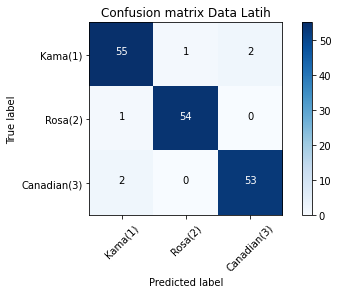

In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Kama(1)', 'Rosa(2)', 'Canadian(3)'],normalize= False,  title='Confusion matrix Data Latih')

- Dapat dilihat pada figure diatas saat training pertama bahwa kelas Kama(1) sebanyak 4 data diprediksi bahwa itu adalah kelas Canadian(3)

- Saat training kedua bahwa kelas Canaadian(3) sebanyak 2 data diprediksi bahwa itu adalah kelas Kama(1)

- Saat training ketiga bahwa kelas Canaadian(3) sebanyak 2 data diprediksi bahwa itu adalah kelas Kama(1) dan kelas Kama(1) sebanyak 4 data diprediksi bahwa itu adalah kelas Canadian(3)

- Saat training keempat bahwa kelas Canadian(3) sebanyak 2 data diprediksi bahwa itu kelas Kama(1) dan sebanyak 2 data Kama(1) diprediksi sebagai Canadian(3)

- Saat training kelima hasil sama dengan training keempat namun ada satu data Rosa(2) yang diprediksi sebagai Kama(1) dan sebaliknya

Selanjutnya akan dilakukan prediksi/pengujian untuk data uji dan confusion matrix untuk data uji

[[12  0  0]
 [ 0 15  0]
 [ 1  0 14]]
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00        15
           3       1.00      0.93      0.97        15

    accuracy                           0.98        42
   macro avg       0.97      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42

Confusion matrix, without normalization
[[12  0  0]
 [ 0 15  0]
 [ 1  0 14]]


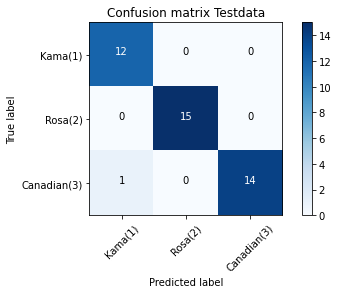

In [ ]:
predictions= mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
cnf_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Kama(1)', 'Rosa(2)', 'Canadian(3)'],normalize= False,  title='Confusion matrix Testdata')

Pada hasil pengujian data uji dapat dilihat hasil dari akurasi pengujian, akurasi pengujian diperlakukan sama dengan pegujian data latih yaitu dengan melakukan rata-rata akurasi dari 5 kali pengujian.

Pengujian 1 = 97%

Pengujian 2 = 97%

Pengujian 3 = 97%

Pengujian 4 = 97%

Pengujian 5 = 97%

Rata-rata = 97%

- Pada hasil pengujian pertama dapat dilihat kelas Canadian(3) ada satu data yang masuk prediksi pada kelas Kama(1)

- Pada hasil pengujian kedua hasil sama dengan pengujian pertama

- Pada hasil pengujian ketiga hasil sama dengan pengujian pertama dan kedua

- Pada hasil pengujian keemapt hasil sama dengan pengujian sebelumnya

- Pada hasil pengujian kelima hasil sama dengan pengujian sebelumnya

Kesimpulan :
akurasi pada algoritma NN dapat berubah ubah dikarenakan bobotnya berubah-berubah dari 5 kali percobaan, dimana nilai training tertinggi pada uji coba ke 4 yaitu 98%, rata rata akurasi pelatihan pada lagoritma NN adalah 95.6%.
Hasil pengujian data uji dapat dilihat hasil dari akurasi pengujian dengan 5 kali percobaan mendapatkan hasil yang sama yaitu 97%.

Dilihat dari data diatas bahwa kelas Kama(1) diprediksi menjadi kelas Candian(3) dan kebalikannya, kemungkinan dikarenakan nilai salah satu ciri fitur dari kedua kelas tersebut hampir mirip.